# Explore here

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from pickle import dump

In [17]:
# Your code here
medical_in = pd.read_csv('/workspace/machine-learning-streamlit/data/raw/medical_insurance_cost.csv')


In [5]:
medical_in.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_in.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
medical_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


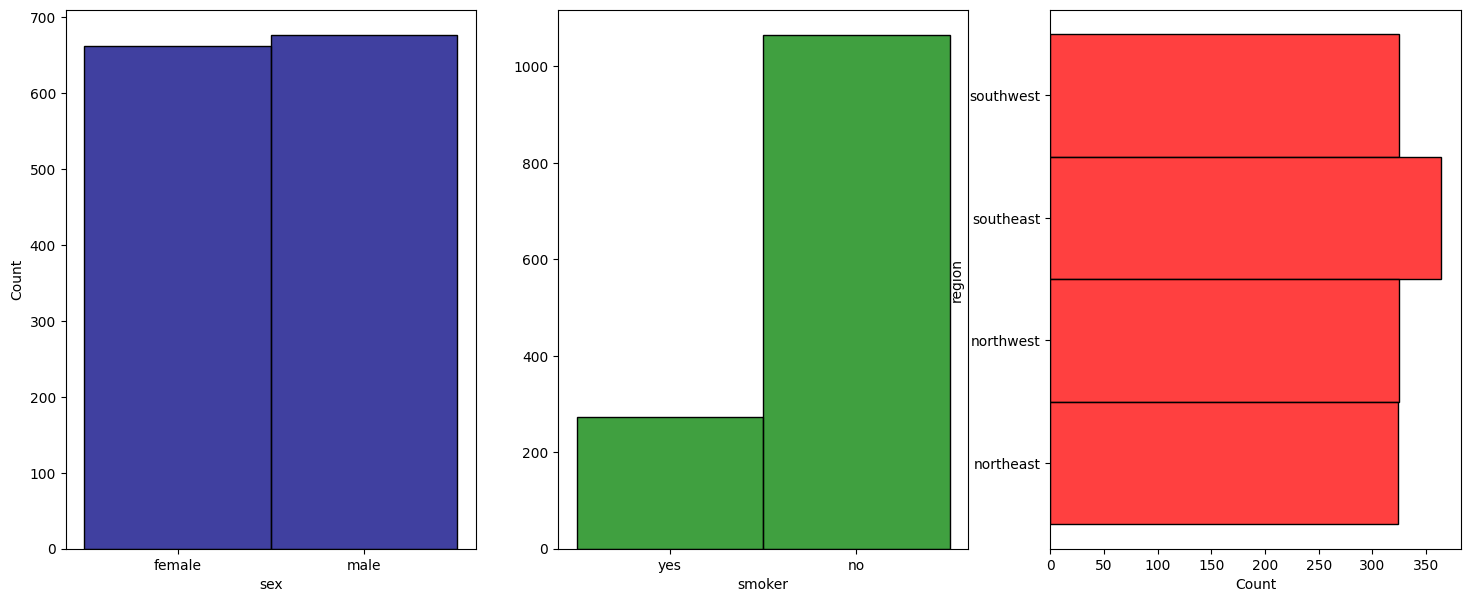

In [62]:

#Categorical
fig, axis = plt.subplots(1, 3, figsize = (18, 7))

sns.histplot(ax = axis[0], data = medical_in, x = "sex", color='navy')
sns.histplot(ax = axis[1], data = medical_in, x = "smoker", color='green').set_ylabel(None)
sns.histplot(ax = axis[2], data = medical_in, y = "region", color='red')

plt.show()

As the plot shows, sex and region are very even, while smoker has a majority for the no.

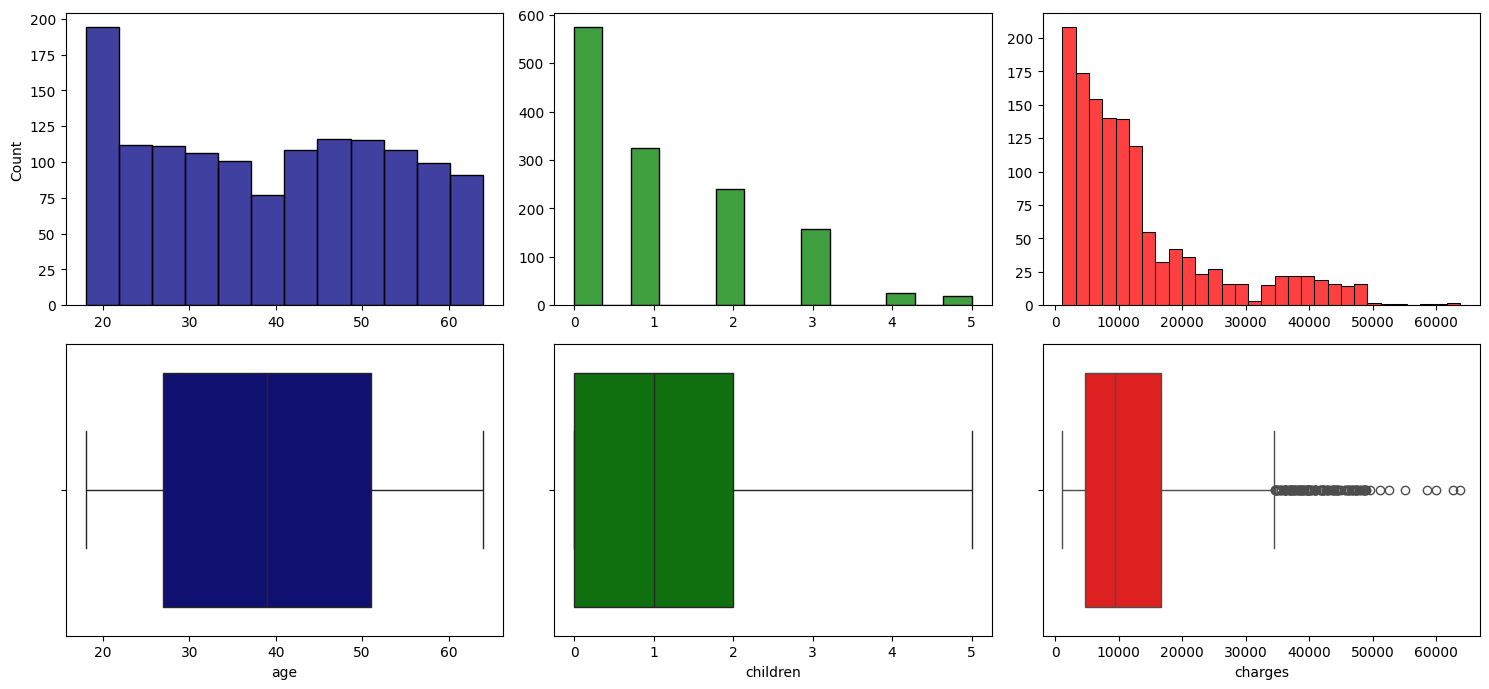

In [63]:
#Numeric
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = medical_in, x = "age", color='navy').set_xlabel(None)
sns.boxplot(ax = axis[1, 0], data = medical_in, x = "age", color='navy')
sns.histplot(ax = axis[0, 1], data = medical_in, x = "children", color='green').set_xlabel(None)
axis[0, 1].set_ylabel(None)
sns.boxplot(ax = axis[1, 1], data = medical_in, x = "children", color='green')
sns.histplot(ax = axis[0, 2], data = medical_in, x = "charges", color='red').set_xlabel(None)
axis[0, 2].set_ylabel(None)
sns.boxplot(ax = axis[1, 2], data = medical_in, x = "charges", color='red')

plt.tight_layout()
plt.show()

For this case, the plot show as that the data for children and charges are clearly right-skewed, but for the age the right-skewed is minimum.

In [64]:
medical_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

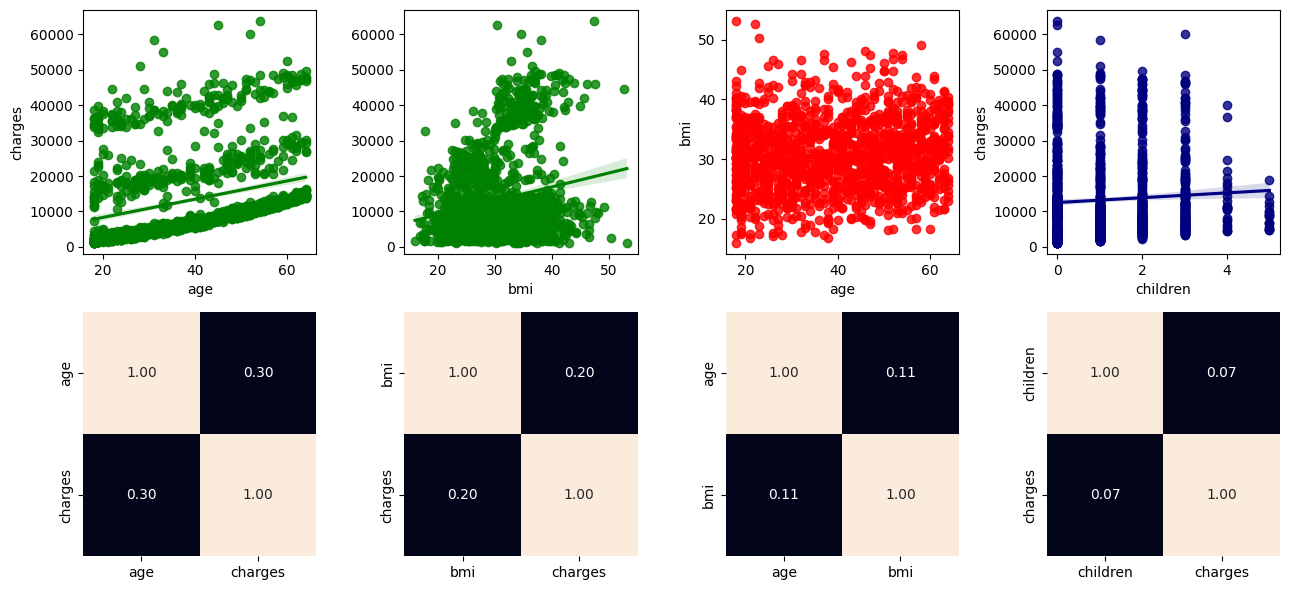

In [65]:
#Numeric-numeric
fig, axis = plt.subplots(2, 4, figsize = (13, 6))

sns.regplot(ax = axis[0, 0], data = medical_in, x = "age", y = "charges", color='green')
sns.heatmap(medical_in[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = medical_in, x = "bmi", y = "charges", color='green').set_ylabel(None)
sns.heatmap(medical_in[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = medical_in, x = "age", y = "bmi", color='red')
sns.heatmap(medical_in[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = medical_in, x = "children", y = "charges", color='navy')
sns.heatmap(medical_in[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

plt.tight_layout()
plt.show()

For those number variables, the plot shows that we have a small but clear correlation between age and charges, also for de bmi and charges. 

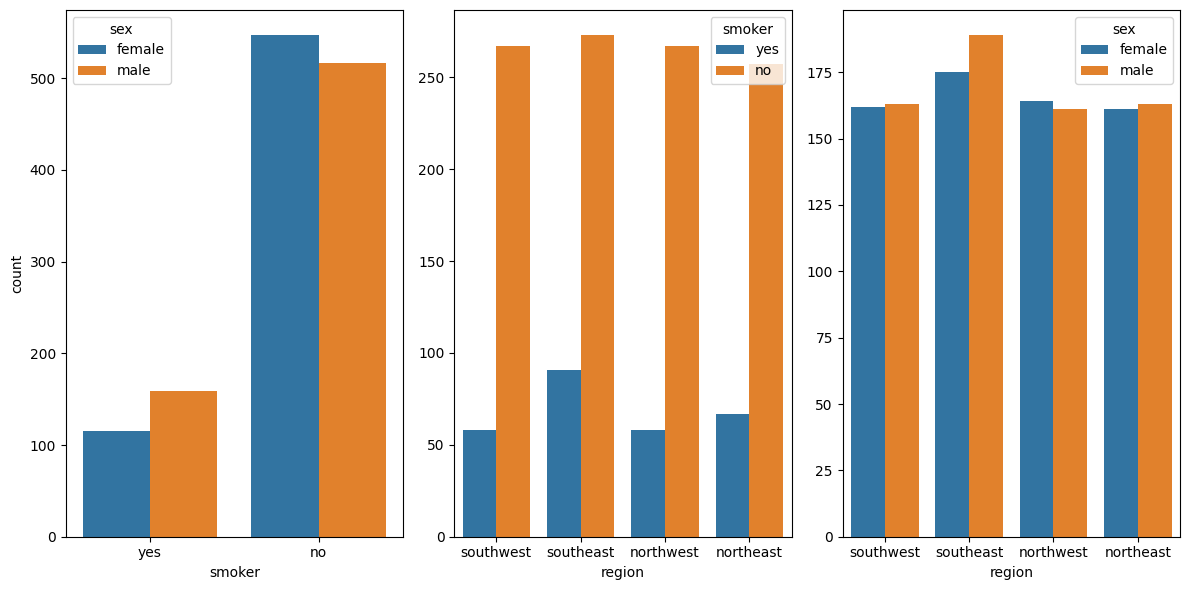

In [66]:
#Categorical-categorical
fig, axis = plt.subplots(1, 3, figsize = (12, 6))

sns.countplot(ax = axis[0], data = medical_in, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1], data = medical_in, x = "region", hue = "smoker").set_ylabel(None)
sns.countplot(ax = axis[2], data = medical_in, x = "region", hue = "sex").set_ylabel(None)


plt.tight_layout()
plt.show()

For this categorical plots, we can conclude that the smokers are minory, and the majory that smokes are male. For the region, its clear that the sex is even and as the smoker plot shows, the smokers are minority but a little higher in southeast. 

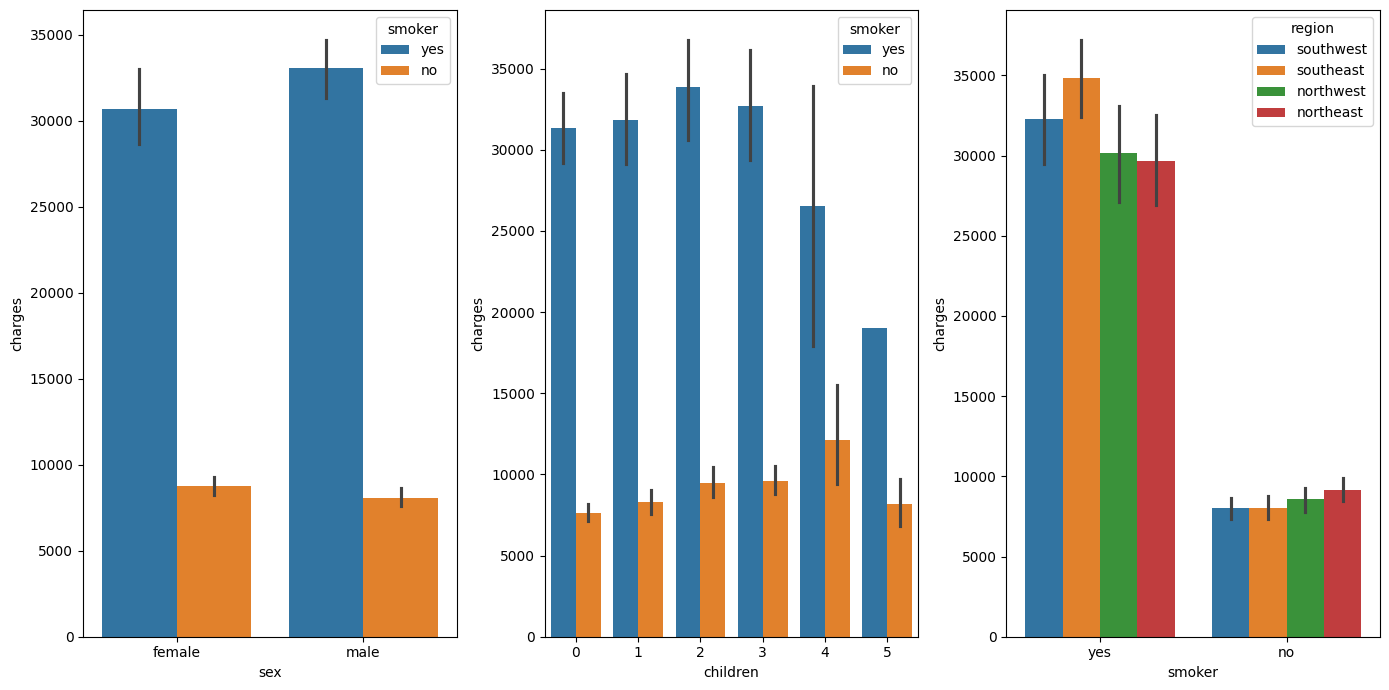

In [67]:
fig, axis = plt.subplots(figsize = (14, 7), ncols = 3)

sns.barplot(ax = axis[0], data = medical_in, x = "sex", y = "charges", hue = "smoker")
sns.barplot(ax = axis[1], data = medical_in, x = "children", y = "charges", hue = "smoker")
sns.barplot(ax = axis[2], data = medical_in, y = "charges", x = "smoker", hue = "region")

plt.tight_layout()

plt.show()

In this plots we can apreciate that for the smokers the charge are really high in comparison with the no smokers, even for region the smoker's charges are higher. The charges for those who have children are very even. 

In [18]:
#factorize
medical_in['sex_n'] = pd.factorize(medical_in['sex'])[0]
medical_in['smoker_n'] = pd.factorize(medical_in['smoker'])[0]
medical_in['region_n'] = pd.factorize(medical_in['region'])[0]
medical_in.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [19]:
smoker_described = medical_in.set_index('smoker_n')['smoker'].to_dict()
region_described = medical_in.set_index('region_n')['region'].to_dict()
sex_described = medical_in.set_index('sex_n')['sex'].to_dict()
region_described

{0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}

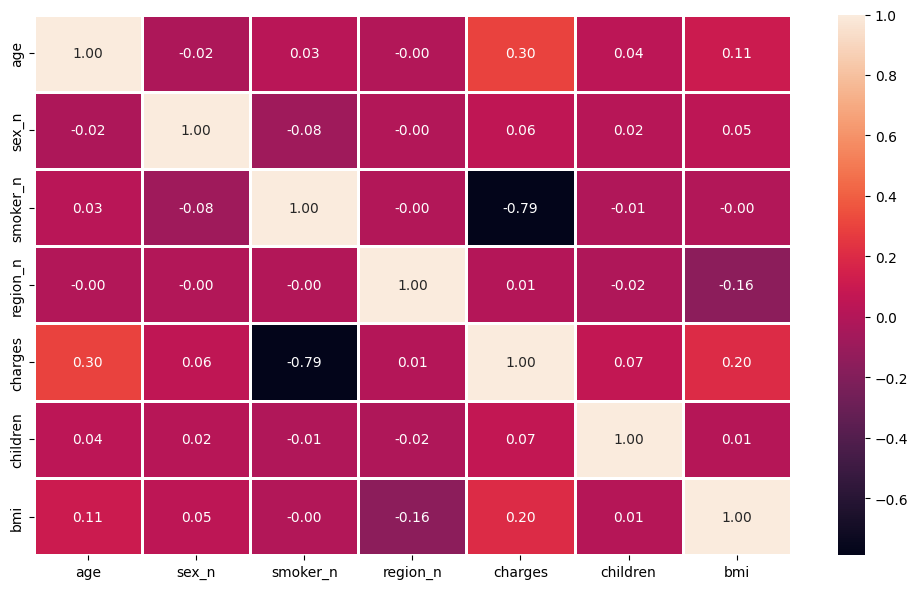

In [13]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(medical_in[['age','sex_n', 'smoker_n', 'region_n', 'charges', 'children', 'bmi']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

As this correlation shows:
- the charges and smoke are really correlated in a negative way, what means that the clients that smoke have a higher health insurance contribution.
- charges and age are a bit correlated, this because the charges increase with the age.
- the bmi and charge are also a bit correlated. 


<Axes: >

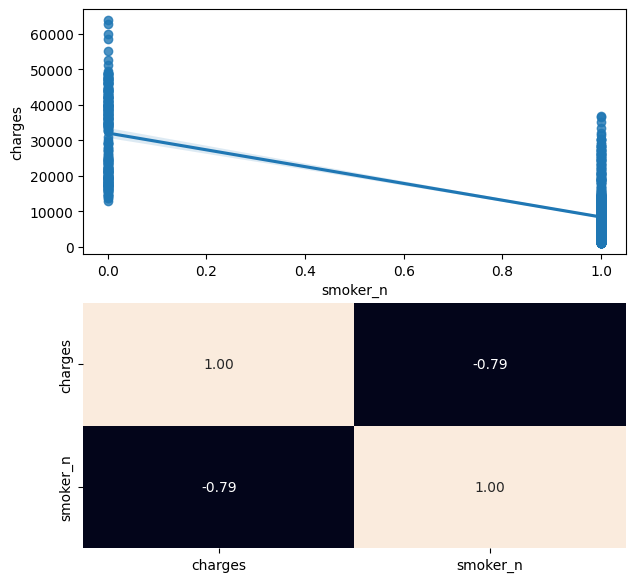

In [14]:
fig, axis = plt.subplots(2, 1, figsize = (7, 7))
sns.regplot(data = medical_in, x = "smoker_n", y = "charges", ax = axis[0])
sns.heatmap(medical_in[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

As we saw in the previous plots, the charges increase if the client is smoker.

In [15]:
medical_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

<Axes: ylabel='charges'>

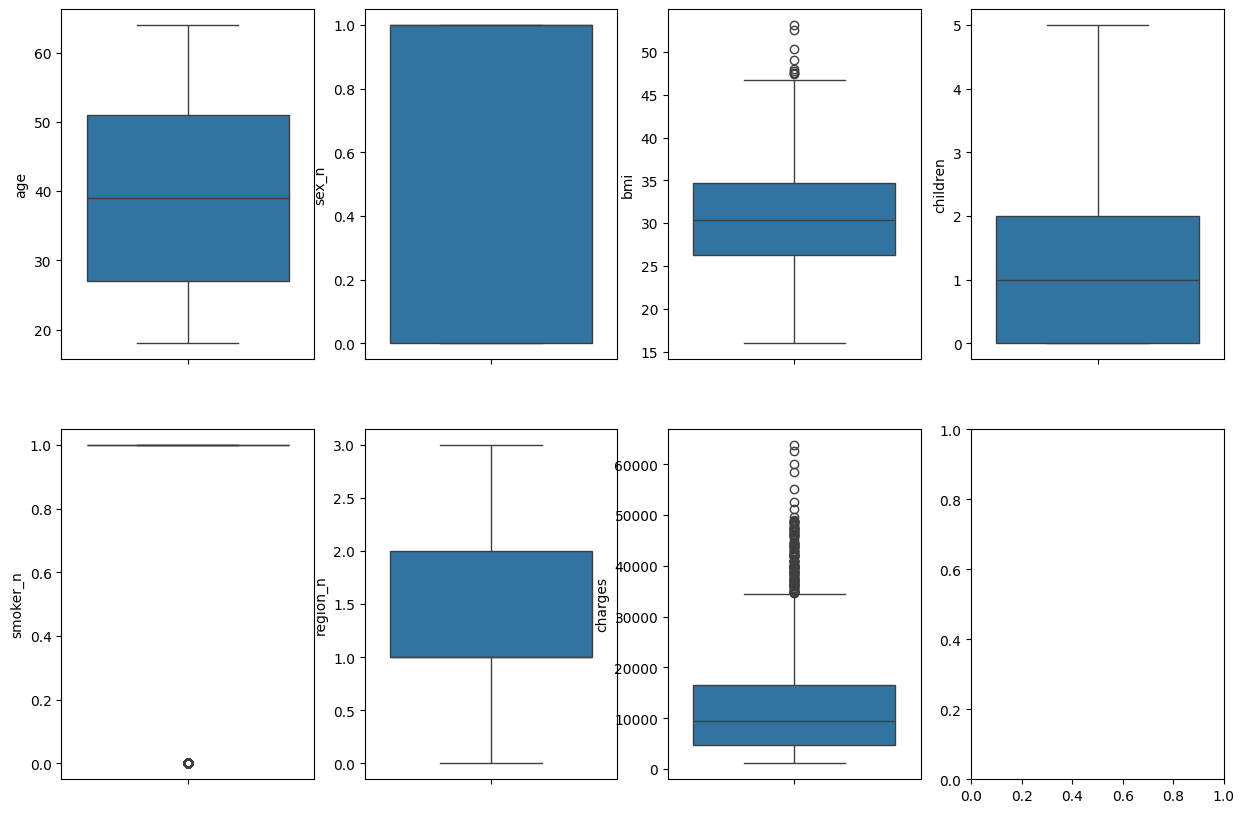

In [16]:
fig, axis = plt.subplots(2, 4, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = medical_in, y = "age")
sns.boxplot(ax = axis[0, 1], data = medical_in, y = "sex_n")
sns.boxplot(ax = axis[0, 2], data = medical_in, y = "bmi")
sns.boxplot(ax = axis[0, 3], data = medical_in, y = "children")
sns.boxplot(ax = axis[1, 0], data = medical_in, y = "smoker_n")
sns.boxplot(ax = axis[1, 1], data = medical_in, y = "region_n")
sns.boxplot(ax = axis[1, 2], data = medical_in, y = "charges")

In [17]:
medical_in.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [8]:
medical_in.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

num_variables = ['age','sex_n', 'smoker_n', 'children', 'bmi', 'region_n']


# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = medical_in.drop('charges', axis = 1)[num_variables]
y = medical_in['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

selection_model = SelectKBest(f_regression, k = 6)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)
X_train_sel.head()

,age,sex_n,smoker_n,children,bmi,region_n
0,18.0,0.0,0.0,0.0,36.85,1.0
1,30.0,0.0,1.0,0.0,27.93,3.0
2,48.0,1.0,1.0,0.0,29.70,1.0
3,18.0,1.0,0.0,0.0,38.17,1.0
4,19.0,0.0,0.0,0.0,21.70,0.0


In [23]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

X_train_sel.to_csv('/workspace/machine-learning-streamlit/data/processed/clean_train.csv', index = False)
X_test_sel.to_csv('/workspace/machine-learning-streamlit/data/processed/clean_test.csv', index = False)


In [24]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,sex_n,smoker_n,children,bmi,region_n,charges
0,18.0,0.0,0.0,0.0,36.85,1.0,36149.4835
1,30.0,0.0,1.0,0.0,27.93,3.0,4137.5227
2,48.0,1.0,1.0,0.0,29.70,1.0,7789.6350
3,18.0,1.0,0.0,0.0,38.17,1.0,36307.7983
4,19.0,0.0,0.0,0.0,21.70,0.0,13844.5060


In [25]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

scaler = StandardScaler()

# Ajusta el objeto a los datos de entrenamiento
scaler.fit(X_train)

# Normaliza los datos de entrenamiento y prueba
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [26]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 10892.731940032498
Coefficients (b1, b2): [   262.26352431    -58.25976836 -23840.06610383    407.98188941
    336.41344227    201.71936286]


In [29]:
y_pred = model.predict(X_test)
y_pred

array([ 9958.37671059,  5929.3008168 , 30722.21722942,  6076.52947368,
        1636.85073739,  1987.40954363,  2904.94825198, 17669.79291291,
        9041.21729922, 32851.7112547 ,  9395.70001923, 11289.37439637,
        9059.77080294,  3333.25526849,  4557.056335  ,  3059.08463449,
        7171.58513028, 12117.53074454,  3532.35504066, 11906.94020978,
       10081.57288092,  5491.13692331, 13314.26489975, 11928.59105559,
       28365.24912734,   345.08482203, 13722.51274797, 13291.77430449,
        7477.16673699, 12664.0533694 ,  8140.75549852,  4599.08954089,
       32837.83579473, 35967.93775839,  9036.29090184,  5665.72528806,
        6986.9758359 ,  9748.77091036,  7543.89066157, 39993.1799766 ,
        3139.20442027,  5876.76207194, 14710.4343623 , 32627.76915867,
        2698.03944568,  8162.58867656,  9971.46746665, 31856.35888687,
       16500.41128016,  9749.02403422, 13285.44429609, 33628.62598717,
        8303.08361398, 34228.11041481, 16360.95198469,  2102.19299155,
      

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import math

mse_sqrt = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprime el resultado
print(f"Raíz cuadrada del MSE: {mse_sqrt}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Raíz cuadrada del MSE: 6466.485779974646
R2 Score: 0.709638040527346


In [31]:
y_test

0      32108.66282
1       2217.60120
2      21472.47880
3       6250.43500
4       2045.68525
          ...     
263    19515.54160
264     5615.36900
265    10796.35025
266    14382.70905
267    13831.11520
Name: charges, Length: 268, dtype: float64

Save the model and the scaler

In [34]:
dump(model, open("/workspace/machine-learning-streamlit/models/LinearRegression_.sav", "wb"))

In [35]:
with open('/workspace/machine-learning-streamlit/models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)